### **Ponte a prueba 1**

Entrenamiento y evaluación de una CNN con CIFAR-10**

Dado el conjunto de datos CIFAR-10, que consta de imágenes de 32 x 32 x 3 distribuidas en 10 clases, realiza lo siguiente:

1. Carga y preprocesa el conjunto de datos CIFAR-10.
2. Define una CNN con la siguiente estructura:
   - Capa convolucional con 32 filtros de tamaño 3 x 3 y función de activación ReLU.
   - Capa de max pooling de 2 x 2.
   - Capa aplanada (Flatten).
   - Capa densa (fully connected) con 128 neuronas y función de activación ReLU.
   - Capa de salida con 10 neuronas (correspondientes a las 10 clases de CIFAR-10) y función de activación softmax.
3. Compila tu modelo usando el optimizador Adam y la función de pérdida `categorical_crossentropy`.
4. Entrena tu modelo con el conjunto de entrenamiento `x_train` y `y_train` durante 10 épocas.
5. Evalúa el desempeño de tu modelo utilizando el conjunto de prueba `x_test` y `y_test` y reporta la precisión obtenida.

**Código base**

In [ ]:
from tensorflow.keras.datasets import cifar10

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
#Respuesta con comentarios para explicar el proceso

In [ ]:
# Importamos las librerías necesarias
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
def entrenar_y_evaluar_cnn_cifar10():
    # Cargar el conjunto de datos CIFAR-10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalizar las imágenes
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Convertir las etiquetas a one-hot encoding
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    # Crear el modelo CNN
    modelo = Sequential()

    # Capa convolucional
    modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

    # Capa de max pooling
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Capa aplanada
    modelo.add(Flatten())

    # Capa densa
    modelo.add(Dense(128, activation='relu'))

    # Capa de salida
    modelo.add(Dense(10, activation='softmax'))

    # Compilar el modelo
    modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    modelo.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

    # Evaluar el desempeño del modelo en el conjunto de prueba
    perdida, precision = modelo.evaluate(x_test, y_test)

    print(f"Precisión en el conjunto de prueba: {precision * 100:.2f}%")


In [ ]:
entrenar_y_evaluar_cnn_cifar10()

Epoch 1/10
1563/1563 [==============================] - 19s 6ms/step - loss: 1.4751 - accuracy: 0.4765 - val_loss: 1.2586 - val_accuracy: 0.5592
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1723 - accuracy: 0.5904 - val_loss: 1.1393 - val_accuracy: 0.5984
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0518 - accuracy: 0.6340 - val_loss: 1.0806 - val_accuracy: 0.6234
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9758 - accuracy: 0.6600 - val_loss: 1.0794 - val_accuracy: 0.6287
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9037 - accuracy: 0.6851 - val_loss: 1.0317 - val_accuracy: 0.6457
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8448 - accuracy: 0.7049 - val_loss: 1.0204 - val_accuracy: 0.6533
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7894 - accuracy: 0.7263 - val_loss: 1.0621 - val_accuracy

Observamos que con la configuración entrenada el modelo alcanza una precisión en el conjunto de prueba de 64%, una métrica buena considerando que existen 10 opciones de respuesta en la variable objetivo, sin embargo, este valor podrá mejorarse posiblemente con otras configuraciones.

# **Ponte a prueba 2**

Optimización y análisis de una CNN con CIFAR-10

Partiendo del ejercicio anterior donde se entrenó una CNN básica con el conjunto de datos CIFAR-10, realiza las siguientes tareas:

1. **Optimización de la arquitectura:**
   - Añade una segunda capa convolucional con 64 filtros de tamaño 3 x 3 y función de activación ReLU.
   - Añade una segunda capa de max pooling de 2 x 2.
   - Incorpora una capa de dropout con una tasa del 0.5 después de la capa aplanada para reducir el sobreajuste.

2. **Compilación y entrenamiento:**
   - Compila el modelo usando el optimizador Adam y la función de pérdida `categorical_crossentropy`.
   - Entrena el modelo con el conjunto de entrenamiento `x_train` y `y_train` durante 20 épocas.
   - Utiliza un conjunto de validación durante el entrenamiento para monitorear el desempeño en datos no vistos (puedes usar una división del 10% del conjunto de entrenamiento).

3. **Evaluación y análisis:**
   - Evalúa el desempeño del modelo entrenado en el conjunto de prueba `x_test` y `y_test`.
   - Muestra una gráfica con la evolución de la precisión y la pérdida tanto en el conjunto de entrenamiento como en el de validación a lo largo de las épocas.
   - Identifica y muestra algunas imágenes del conjunto de prueba que la CNN clasifique incorrectamente, junto con la etiqueta real y la predicha.

**Nota**: Para resolver este ejercicio, necesitarás incorporar y adaptar aspectos del código del ejercicio anterior, así como añadir nuevas funcionalidades y visualizaciones.

In [ ]:
#Respuesta con comentarios para explicar el proceso

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [ ]:
def optimizar_y_analizar_cnn_cifar10():
    # Cargar el conjunto de datos CIFAR-10
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalizar las imágenes
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Convertir las etiquetas a one-hot encoding
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    # Crear el modelo CNN
    modelo = Sequential()

    # Primera capa convolucional y max pooling
    modelo.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda capa convolucional y max pooling
    modelo.add(Conv2D(64, (3, 3), activation='relu'))
    modelo.add(MaxPooling2D(pool_size=(2, 2)))

    # Capa aplanada y dropout
    modelo.add(Flatten())
    modelo.add(Dropout(0.5))

    # Capa densa
    modelo.add(Dense(128, activation='relu'))

    # Capa de salida
    modelo.add(Dense(10, activation='softmax'))

    # Compilar el modelo
    modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo y guardar la historia
    historia = modelo.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

    # Evaluar el desempeño del modelo en el conjunto de prueba
    perdida, precision = modelo.evaluate(x_test, y_test)
    print(f"Precisión en el conjunto de prueba: {precision * 100:.2f}%")

    # Gráficas de precisión y pérdida durante el entrenamiento
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(historia.history['accuracy'], label='Entrenamiento')
    plt.plot(historia.history['val_accuracy'], label='Validación')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(historia.history['loss'], label='Entrenamiento')
    plt.plot(historia.history['val_loss'], label='Validación')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Identificar y mostrar imágenes incorrectamente clasificadas
    predicciones = modelo.predict(x_test)
    etiquetas_predichas = np.argmax(predicciones, axis=1)
    etiquetas_reales = np.argmax(y_test, axis=1)

    incorrectas = np.where(etiquetas_predichas != etiquetas_reales)[0]
    print(f"Número total de imágenes incorrectas: {len(incorrectas)}")

    # Mostrar algunas imágenes incorrectamente clasificadas
    for i, incorrecta in enumerate(incorrectas[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(x_test[incorrecta])
        plt.title(f"Real: {etiquetas_reales[incorrecta]}, Pred: {etiquetas_predichas[incorrecta]}")
        plt.axis('off')
    plt.show()


Epoch 1/20
1407/1407 [==============================] - 9s 5ms/step - loss: 1.5602 - accuracy: 0.4316 - val_loss: 1.2480 - val_accuracy: 0.5600
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.2574 - accuracy: 0.5533 - val_loss: 1.1010 - val_accuracy: 0.6116
Epoch 3/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1410 - accuracy: 0.5956 - val_loss: 1.0092 - val_accuracy: 0.6450
Epoch 4/20
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0546 - accuracy: 0.6253 - val_loss: 0.9865 - val_accuracy: 0.6496
Epoch 5/20
1407/1407 [==============================] - 6s 5ms/step - loss: 0.9918 - accuracy: 0.6515 - val_loss: 0.8984 - val_accuracy: 0.6930
Epoch 6/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9445 - accuracy: 0.6691 - val_loss: 0.8691 - val_accuracy: 0.7004
Epoch 7/20
1407/1407 [==============================] - 6s 4ms/step - loss: 0.9058 - accuracy: 0.6829 - val_loss: 0.8822 - val_accuracy:

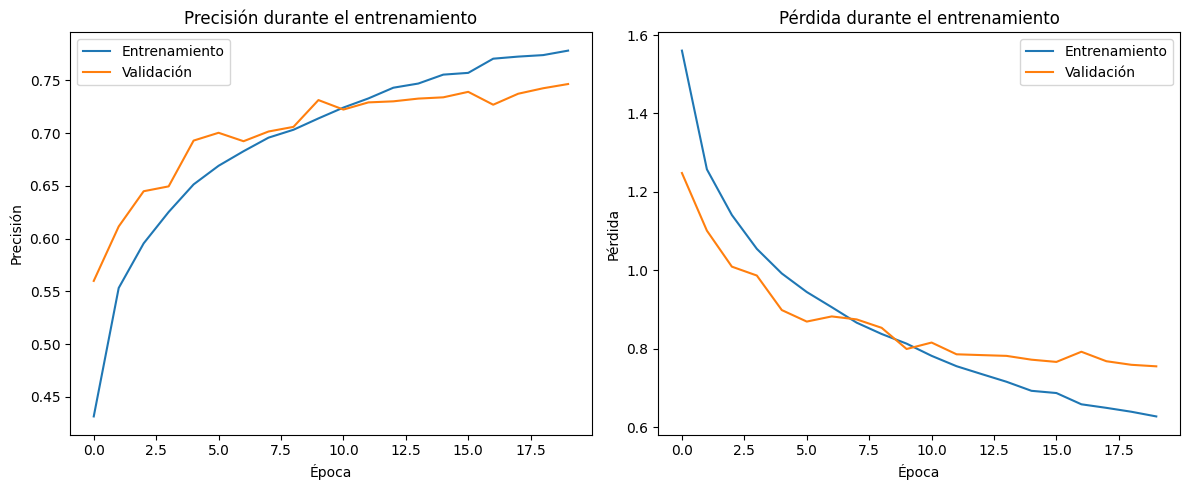

313/313 [==============================] - 1s 2ms/step
Número total de imágenes incorrectas: 2729


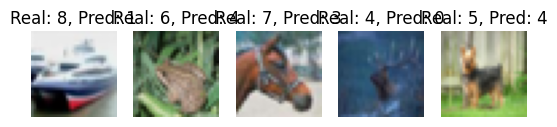

In [ ]:
optimizar_y_analizar_cnn_cifar10()

Se observa que el accuracy mejoró con la nueva configuración con respecto al ejercicio inicial.

**Reto semanal**

Vuelve a programar la red neuronal convolucional con el conjunto de entrenamiento usado en este notebook, pero intenta hacerlo con distintos valores, sobre todo aquellos que tengan que ver con `epochs`, `batch_size`, `learning_rate`, `decay` y, si lo crees posible, agrega más capas ocultas a la red neuronal.

No olvides medir la eficiencia del modelo y, sobre todo, considera el tiempo de procesamiento.


**Código base**

In [ ]:
# Importamos las librerías necesarias
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, optimizers

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.flatten()
y_test = y_test.flatten()

name = [
    'avión',
    'automóvil',
    'ave',
    'gato',
    'ciervo',
    'perro',
    'rana',
    'caballo',
    'barco',
    'camión'
]

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [ ]:
#Respuesta con comentarios para explicar el proceso

In [ ]:
# Importamos las librerías necesarias
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, optimizers

# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

y_train = y_train.flatten()
y_test = y_test.flatten()

name = [
    'avión',
    'automóvil',
    'ave',
    'gato',
    'ciervo',
    'perro',
    'rana',
    'caballo',
    'barco',
    'camión'
]

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [ ]:
# Definir el modelo
model_optimized = Sequential()

# Primer bloque de convoluciones
model_optimized.add(Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'))
model_optimized.add(Conv2D(32, 3, activation='relu'))
model_optimized.add(MaxPooling2D())
model_optimized.add(Dropout(0.25))

# Segundo bloque de convoluciones
model_optimized.add(Conv2D(64, 3, padding='same', activation='relu'))
model_optimized.add(Conv2D(64, 3, activation='relu'))
model_optimized.add(MaxPooling2D())
model_optimized.add(Dropout(0.25))

# Tercer bloque de convoluciones (añadido)
model_optimized.add(Conv2D(128, 3, padding='same', activation='relu'))
model_optimized.add(Conv2D(128, 3, activation='relu'))
model_optimized.add(MaxPooling2D())
model_optimized.add(Dropout(0.25))

# Capas densas
model_optimized.add(Flatten())
model_optimized.add(Dense(512, activation='relu'))
model_optimized.add(Dropout(0.5))
model_optimized.add(Dense(256, activation='relu')) # Capa adicional
model_optimized.add(Dropout(0.5))
model_optimized.add(Dense(10, activation='softmax'))

model_optimized.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

Epoch 1/30
782/782 [==============================] - 12s 11ms/step - loss: 1.8139 - acc: 0.3106 - val_loss: 1.4280 - val_acc: 0.4732
Epoch 2/30
782/782 [==============================] - 8s 10ms/step - loss: 1.3401 - acc: 0.5146 - val_loss: 1.1781 - val_acc: 0.5751
Epoch 3/30
782/782 [==============================] - 7s 9ms/step - loss: 1.1536 - acc: 0.5903 - val_loss: 1.0130 - val_acc: 0.6349
Epoch 4/30
782/782 [==============================] - 8s 10ms/step - loss: 1.0217 - acc: 0.6407 - val_loss: 0.8932 - val_acc: 0.6853
Epoch 5/30
782/782 [==============================] - 7s 9ms/step - loss: 0.9165 - acc: 0.6792 - val_loss: 0.7933 - val_acc: 0.7219
Epoch 6/30
782/782 [==============================] - 8s 10ms/step - loss: 0.8481 - acc: 0.7034 - val_loss: 0.7588 - val_acc: 0.7343
Epoch 7/30
782/782 [==============================] - 7s 9ms/step - loss: 0.7923 - acc: 0.7256 - val_loss: 0.7130 - val_acc: 0.7503
Epoch 8/30
782/782 [==============================] - 7s 9ms/step - los

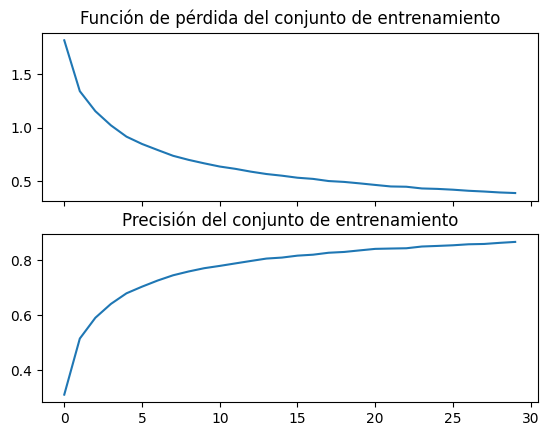

In [ ]:
# Compilar el modelo con optimizador Adam
model_optimized.compile(optimizers.Adam(learning_rate=0.0005),
                        loss='categorical_crossentropy', metrics=['acc'])

# Ajustar hiperparámetros
batch_size = 64 # Tamaño de lote más grande
epochs = 30 # Menos épocas, considerando el tiempo de procesamiento

# Entrenar el modelo
history_optimized = model_optimized.fit(x_train, y_train,
                                        batch_size=batch_size,
                                        epochs=epochs,
                                        validation_data=(x_test, y_test))

# Visualizar resultados
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history_optimized.history['loss'])
ax1.set_title('Función de pérdida del conjunto de entrenamiento')
ax2 = fig.add_subplot(2,1,2, sharex=ax1)
ax2.plot(history_optimized.history['acc'])
ax2.set_title('Precisión del conjunto de entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)

plt.show()

Las modificaciones sugeridas incluyen:

- Agregar un tercer bloque de capas convolucionales con más filtros (128).
- Añadir una capa densa adicional con 256 neuronas antes de la capa de salida.
- Cambiar el optimizador a Adam con un learning rate de 0.0005.
- Aumentar el tamaño del lote (batch_size) a 64.
- Reducir el número de épocas a 30 para compensar el tiempo adicional de procesamiento debido a la complejidad añadida.

Estas modificaciones pueden mejorar el rendimiento del modelo, pero es importante notar que el tiempo de procesamiento también puede aumentar debido a la mayor complejidad del modelo. Es recomendable monitorear ambos aspectos al entrenar.